# 一、python基础

# 1. 匿名函数与map方法，精髓在于匿名
### 匿名函数的用法其实违背了“匿名”的含义，事实上它往往在无需多处调用的场合进行使用，用户不关心函数的名字，只关心这种映射的关系
### 也就是说，我不需要对匿名函数进行命名，而是直接使用这种映射关系就行

In [1]:
[(lambda x: 2*x)(i) for i in range(5)]

[0, 2, 4, 6, 8]

### map是将数据（元素、列表等）通过某种方法进行映射

In [2]:
list(map(lambda x: 2*x, range(5)))

[0, 2, 4, 6, 8]

# 2. zip对象与enumerate方法
### zip函数能够把多个可迭代对象打包成一个元组构成的可迭代对象，它返回了一个 zip 对象，通过 tuple, list 可以得到相应的打包结果
### 往往会在循环迭代的时候使用到 zip 函数

In [3]:
L1, L2, L3 = list('abc'), list('def'), list('hij')
for i, j, k in zip(L1, L2, L3):
    print(i, j, k)

a d h
b e i
c f j


### enumerate 是一种特殊的打包，它可以在迭代时绑定迭代元素的遍历序号

In [4]:
L = list('abcd')

for index, value in enumerate(L):
    print(index, value)

0 a
1 b
2 c
3 d


### 当需要对两个列表建立字典映射时，可以利用 zip 对象

In [5]:
dict(zip(L1, L2))

{'a': 'd', 'b': 'e', 'c': 'f'}

### 既然有了压缩函数，那么 Python 也提供了 * 操作符和 zip 联合使用来进行解压操作

In [6]:
zipped = list(zip(L1, L2, L3))
zipped

[('a', 'd', 'h'), ('b', 'e', 'i'), ('c', 'f', 'j')]

In [7]:
list(zip(*zipped)) # 三个元组分别对应原来的列表

[('a', 'b', 'c'), ('d', 'e', 'f'), ('h', 'i', 'j')]

# 二、numpy基础

In [2]:
import numpy as np

### 1. np数组的构造

### 等差数列：np.linspace, np.arange
#### np.linspace(1,5,11) # 起始、终止（包含）、样本个数
#### np.arange(1,5,2) # 起始、终止（不包含）、步长
### 特殊矩阵： zeros, eye, full
#### np.zeros((2,3)) # 传入元组表示各维度大小
#### np.eye(3) # 3*3的单位矩阵
#### np.eye(3, k=1) # 偏移主对角线1个单位的伪单位矩阵
#### np.full((2,3), 10) # 元组传入大小，10表示填充数值
#### np.full((2,3), [1,2,3]) # 每行填入相同的列表
### 随机矩阵： np.random
#### 最常用的随机生成函数为 rand, randn, randint, choice

### 2. np数组的变形与合并

### 转置： T
#### np.zeros((2,3)).T
### 合并操作： r_, c_
#### np.r_[np.zeros((2,3)),np.zeros((2,3))]
### 维度变换： reshape
#### reshape 能够帮助用户把原数组按照新的维度重新排列。在使用时有两种模式，分别为 C 模式和 F 模式，分别以逐行和逐列的顺序进行填充读取

### 3. np数组的切片与索引

#### 数组的切片模式支持使用 slice 类型的 start:end:step 切片，还可以直接传入列表指定某个维度的索引进行切片
#### 此外，还可以利用 np.ix_ 在对应的维度上使用布尔索引，但此时不能使用 slice 切片

### 4. 常用函数

### where,是一种条件函数，可以指定满足条件与不满足条件位置对应的填充
#### np.where(a>0, a, 5) # 对应位置为True时填充a对应元素，否则填充5
### nonzero, argmax, argmin
#### 这三个函数返回的都是索引， nonzero 返回非零数的索引， argmax, argmin 分别返回最大和最小数的索引
### any, all
#### any 指当序列至少 存在一个 True 或非零元素时返回 True ，否则返回 False
#### all 指当序列元素 全为 True 或非零元素时返回 True ，否则返回 False
### cumprod, cumsum, diff
#### cumprod, cumsum 分别表示累乘和累加函数，返回同长度的数组， diff 表示和前一个元素做差，由于第一个元素为缺失值，因此在默认参数情况下，返回长度是原数组减1
### 统计函数
#### 常用的统计函数包括 max, min, mean, median, std, var, sum, quantile ，其中分位数计算是全局方法，因此不能通过 array.quantile 的方法调用
#### 对于协方差和相关系数分别可以利用 cov, corrcoef

### 5. 广播机制
#### 会将本来维度对应不上的运算，映射到其他全局

### 6. 向量与矩阵的计算

#### 向量内积： dot，点乘
#### 向量范数和矩阵范数： np.linalg.norm
#### 矩阵乘法 a@b

# 三、练习

### Ex1：利用列表推导式写矩阵乘法

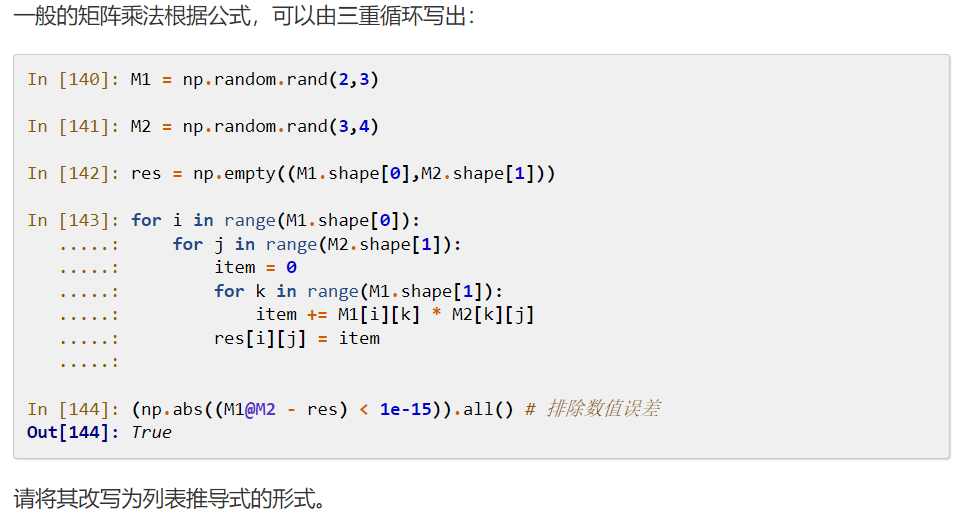

In [10]:
M1 = np.random.rand(2,3)
M2 = np.random.rand(3,4)

res = np.array([m1.dot(m2) for m1 in M1 for m2 in M2.T]).reshape(M1.shape[0],M2.shape[1])
(np.abs((M1@M2 - res) < 1e-15)).all() # 排除数值误差

True

### Ex2：更新矩阵

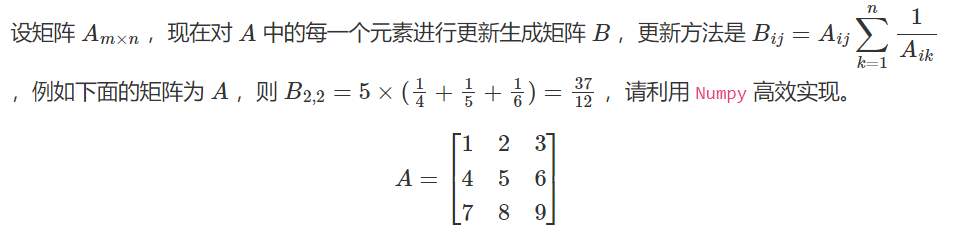

In [ ]:
A = np.arange(1,10,1).reshape(3,3)

(A.T * (1/A).sum(axis = 1)).T

### Ex3：卡方统计量

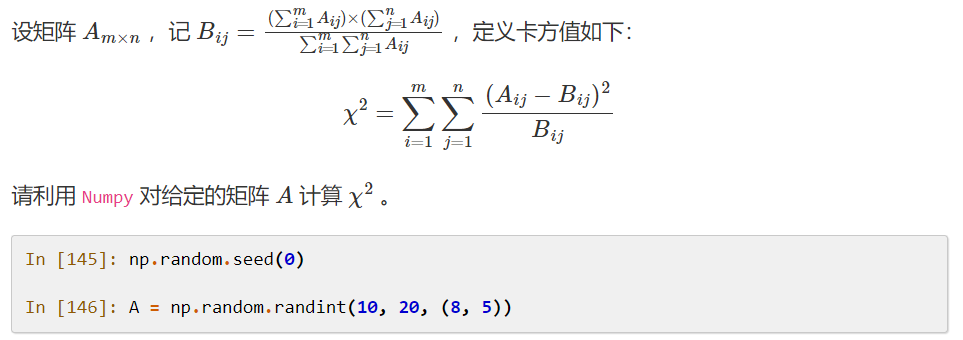

In [5]:
np.random.seed(0)

A = np.random.randint(10, 20, (8, 5))

B = A.sum(0)*A.sum(1).reshape(-1, 1)/A.sum()

res = ((A-B)**2/B).sum()

res

11.842696601945802

### Ex4：改进矩阵计算的性能

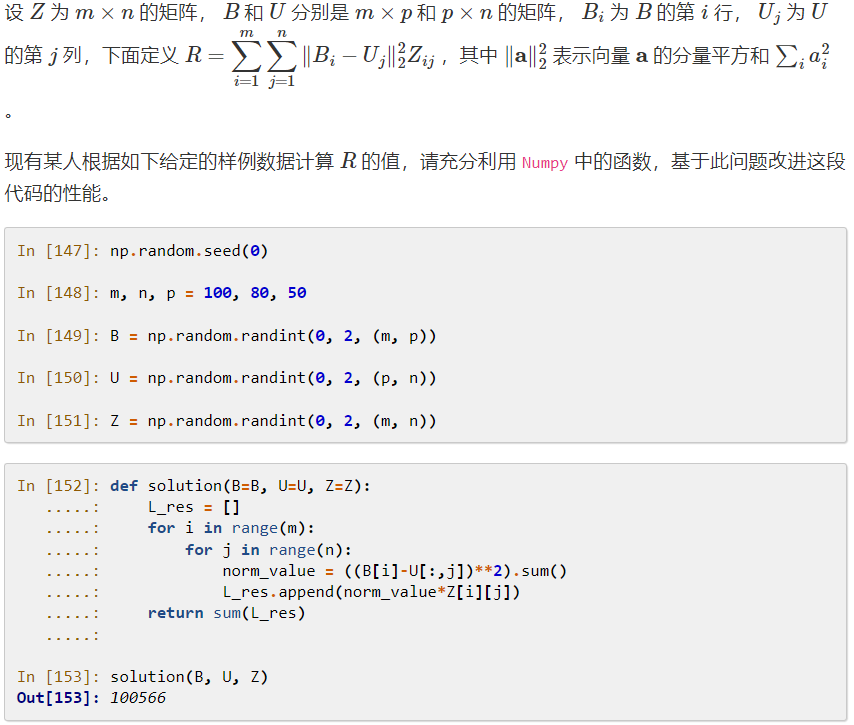

In [4]:
np.random.seed(0)

m, n, p = 100, 80, 50
B = np.random.randint(0, 2, (m, p))
U = np.random.randint(0, 2, (p, n))
Z = np.random.randint(0, 2, (m, n))

(((B**2).sum(1).reshape(-1,1) + (U**2).sum(0) - 2*B@U)*Z).sum()

100566

### Ex5：连续整数的最大长度

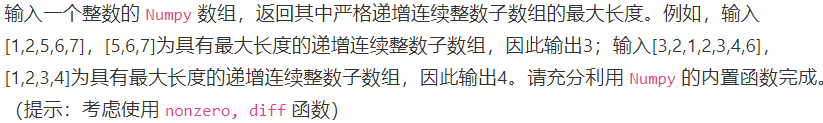

In [3]:
f = lambda x:np.diff(np.nonzero(np.r_[1,np.diff(x)!=1,1])).max()
print(f([1,2,5,6,7]))
print(f([3,2,1,2,3,4,6]))

3
4
